In [1]:
import PyPDF2
import pdfplumber
import textract
import docx2txt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer 

In [2]:
#Resumes we are going to use during our analysis
with pdfplumber.open(r"C:\Jasmine\resume (1) aryan.pdf") as pdf:
    resume1 = ""
    for page in pdf.pages:
        resume1 += page.extract_text()
print(resume1)

.
Aryan Singh
Aryansingh564738@gmail.com 7011714773 in/aryan-singh-b22462267 github.com/AryanSinghhh
SUMMARY
Highly motivated and detail-oriented final-year B.Tech student in Computer Science and Engineering with a specialization in Data Science.
Proficient in machine learning, and statistical analysis, data visualization with hands-on experience in Python. Seeking a challenging role in
data science where I can apply my analytical and problem-solving skills to drive data-driven decision-making and contribute to innovative
projects.
“I know my data!”
EDUCATION
Bachelor of Technology In Computer Science Specialization in Data Science
Gautam Buddha University • Greater Noida • 2025 • 8.0 CGPA
12th
Delhi Public School • Faridabad • 2021 • 7.2 CGPA
EXPERIENCE
Data Scientist
Cognifyz Technologies REMOTE
• Proficient in data exploration, preprocessing, and handling missing values.
• Skilled in statistical analysis and visualizing distributions of numerical and categorical data.
• Experienced 

In [3]:
with pdfplumber.open(r"C:\Jasmine\resume (1) aryan.pdf") as pdf:
    resume2 = ""
    for page in pdf.pages:
        resume2 += page.extract_text()
#print(text)

In [4]:
#Prompt for the Job description.
jd = input("Enter the job description: ")  

Enter the job description:  Proficiency in SQL and data visualization tools (Tableau, Looker) as well as standard NLP analysis tooling (Numpy, Pandas, Jupyter) Strong knowledge of statistics and experimental design 3+ years experience working with and analyzing large data sets to solve problems (Bonus: part of that with language/text data) The ability to communicate results clearly written, verbally, and via presentations Bonus: an advanced degree in a quantitative field ( Statistics, Sciences, Engineering, CS, Math)


In [5]:
def get_similarity(resume, jd):
    res = ''.join([i for i in resume if not i.isdigit()])
    res_jd=[res, jd]
    cntv = CountVectorizer()
    count_matrix = cntv.fit_transform(res_jd)
    percentage = round((cosine_similarity(count_matrix)[0][1] * 100),2)
    return percentage

In [6]:
per1=get_similarity(resume1,jd)
print("\nSimilarity Scores: between resume 1 and Job Description is ",per1) 


Similarity Scores: between resume 1 and Job Description is  55.02


In [7]:
per2=get_similarity(resume2,jd)
print("\nSimilarity Scores: between resume 2 and Job Description is ",per2) 


Similarity Scores: between resume 2 and Job Description is  55.02


In [8]:
#Used Jaccard distance as a dissimmilarity measure to see how different the resume and JD are
def jaccard_distance(resume1,jd):
    intersection=len(set.intersection(*[set(resume1),set(jd)]))
    union=len(set.union(*[set(resume1),set(jd)]))
    return intersection/float(union)
b=jaccard_distance(resume1,jd) 

print('\n  Jaccard  :  ', b)  


  Jaccard  :   0.5375


In [9]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [10]:
def spell_check(list):
    spell_mistake= False
    for i in list:
        if i.isalpha()==True:
            if i[0].isupper():
                exit
            else:
                i=i.lower()
                word=spell.correction(i)
                if i!= word:
                    print('wrong spelling: ',i,'\nSuggestions are as follow :',word)
                    spell_mistake= True
    if spell_mistake==False:
        print('No spelling mistakes, good to go..') 

In [11]:
word = resume1.split()

In [12]:
spell_check(word)

wrong spelling:  chatbot 
Suggestions are as follow : chariot
wrong spelling:  chatbot 
Suggestions are as follow : chariot
wrong spelling:  analysed 
Suggestions are as follow : analyzed
wrong spelling:  behaviour 
Suggestions are as follow : behavior


In [13]:
from transformers import pipeline

In [14]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
summary = summarizer(str(resume1), do_sample = False )
print(summary[0]["summary_text"])
                     


Device set to use cpu


Aryan Singh is a final-year B.Tech student in Computer Science and Engineering with a specialization in Data Science. He is proficient in machine learning, and statistical analysis, data visualization with hands-on experience in Python. Seeking a challenging role in data science where he can apply his analytical and problem-solving skills to drive data-driven decision-making.


In [15]:
#performing feature extraction
text_list = [resume1, jd]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(text_list)

In [16]:
count_matrix


<2x312 sparse matrix of type '<class 'numpy.int64'>'
	with 334 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
matchPercentage = cosine_similarity(count_matrix)
print(matchPercentage)

[[1.         0.54826226]
 [0.54826226 1.        ]]


In [18]:
# get the match percentage
matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
matchPercentage = round(matchPercentage, 2) 
print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")

Your resume matches about 54.83% of the job description.


In [19]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from rake_nltk import Rake

In [21]:
r=Rake()
r.extract_keywords_from_text(resume1)
keywords_resume1 = r.get_ranked_phrases()
print(keywords_resume1)

['data analytics great learning data science full stack pro physics wallah deep learning neptel skills • phyton • data science tools', '0 cgpa 12th delhi public school • faridabad • 2021 • 7', 'data science gautam buddha university • greater noida • 2025 • 8', '0 physics wallah google analytics great learning crash course', '2 cgpa experience data scientist cognifyz technologies remote • proficient', 'effective decision making • developed interactive dashboards using tableau', 'client senior leadership • created visuals', 'implementing machine learning algorithms using python libraries', 'tata consultancy services • prepared questions', 'solving • leadership • critical thinking', 'etl • communication • problem', 'social media posts • implemented', 'real estate prices • built', 'certifications data science 2', 'classify social media posts using', 'british airways success • scraped', 'forecast real estate prices based', 'simulation involving creating data visualizations', 'data scientist

In [22]:
r.extract_keywords_from_text(jd)
keywords_jd = r.get_ranked_phrases()
print(keywords_jd)

['standard nlp analysis tooling', 'communicate results clearly written', 'analyzing large data sets', 'years experience working', 'experimental design 3', 'data visualization tools', 'via presentations bonus', 'text data', 'strong knowledge', 'solve problems', 'quantitative field', 'advanced degree', 'bonus', 'well', 'verbally', 'tableau', 'statistics', 'statistics', 'sql', 'sciences', 'proficiency', 'part', 'pandas', 'numpy', 'math', 'looker', 'language', 'jupyter', 'engineering', 'cs', 'ability']


In [23]:
present = []
absent = []
for i in keywords_jd:
    if i in keywords_resume1:
        present.append(i) 
    else:
        absent.append(i)
print("Present words are: ", present)
print("Absent words are: ", absent)

Present words are:  ['tableau', 'sql', 'pandas', 'numpy', 'engineering']
Absent words are:  ['standard nlp analysis tooling', 'communicate results clearly written', 'analyzing large data sets', 'years experience working', 'experimental design 3', 'data visualization tools', 'via presentations bonus', 'text data', 'strong knowledge', 'solve problems', 'quantitative field', 'advanced degree', 'bonus', 'well', 'verbally', 'statistics', 'statistics', 'sciences', 'proficiency', 'part', 'math', 'looker', 'language', 'jupyter', 'cs', 'ability']


In [24]:
#Classification of skills

In [25]:
from spacy.matcher import PhraseMatcher

In [26]:
pdfFileObj = open("C:\Jasmine\semal-resume (1).pdf",'rb')

In [27]:
pdfReader = PyPDF2.PdfReader(pdfFileObj)

In [28]:
text=""
count=0
num_pages = len(pdfReader.pages)

In [29]:
while count < num_pages:
        pageObj = pdfReader.pages[count]  # Use the new method
        text += pageObj.extract_text()  # Extract text from the page
        count += 1

In [30]:
text

"+918587868917First Position in Microsoft Azure\nBlogathon by ID8NXT and Microsoft Azure.\nLink\n5 Star Rating on HackerRank for Python\nand SQL. Link \nAcademic achievement:  9.52 SGPA  in 5th\nsemesterA C H I E V E M E N T S\nP R O J E C T SE X P E R T I S E E D U C A T I O N\nT E C H N I C A L  E X P E R I E N C ESQLLanguages:BTech in Computer Science Engineering with Specialization in Machine Learning\n                                                                                                                                   (2021-2025) Gautam Buddha University, Greater Noida\nMachine Learning Intern\nOmnipresent Robot Tech\nDeveloped a software for an Indoor Autonomous Warehouse UAV using\nComputer Vision, Drone Technology and IoT for detecting and recognizing objects\nwith the help of various frameworks and libraries like PyTorch and OpenCV.(July, 2022 - August 2022)\nC E R T I F I C A T I O N S\nCareer Essentials in Generative AI by\nMicrosoft and LinkedIn. Link\nMicrosoft

In [31]:
import re
import string
text = text.lower()
text = re.sub(r'\d+','',text)
text = text.translate(str.maketrans('','',string.punctuation))

In [32]:
# Created dictionary with five concentrations of Data Science

terms = {'Data Engineering & Warehousing ':['build', 'maintain', 'data', 'pipelines', 'engineering', 'organize', 
                                            'large','integrity','testing', 'validation', 'Postgres DBs', 'Kinesis',  
                                            'APIs', 'Gathering', 'ETL', 'Modeling','data warehouse', 'integrate', 
                                            'SQL', 'Server', 'design', 'solution', 'ad-hoc', 'streamline','extraction', 
                                            'troubleshoot', 'architecture', 'endpoints', 'development', 'lake', 'architecture',
                                            'databases', 'NoSQL', 'exploration'],      
        'Data Mining & Statistical Analysis':['SAS', 'ANOVA', 'statistical', 'methodologies', 'regression', 'data mining',
                                             'problem-solving', 'theories', 'test', 'hypotheses', 'anamoly-detection',
                                             'SPSS', 'RStudio', 'quantitative', 'analyses', 'model', 'mathematics', 'statistic',
                                             'techniques', 'Bayesian', 'research', 'sampling', 'findings', 'analysis', 'R',
                                             'conduct', 'insights', 'statistical integrity', 'math', 'identify', 'analyze',
                                             'trend', 'stake-holders', 'MATLAB', 'Inferential Statistics','Multivariate Analysis', 
                                              'Linear','Non-linear', 'mortality', 'risk factors', 'survey'],
        'Cloud & Distributed Computing':['multi-cloud', 'develop','cloud solutions', 'domain','architects', 'technical', 'cloud',
                                        'architecture','engineering', 'TOGAF','Zachman', 'Policies','Governance', 'Strategies',
                                        'AWS', 'Redshift', 'PostgresQL', 'Oracle', 'cloud based', 'OLTP''metadata','OLAP', 'GCP',
                                        'Spark', 'APIs', 'Python', 'framework', 'understanding', 'data-driven', 'Azure', 'platform',
                                        'design', 'domain', 'tool', 'trend', 'deployment', 'application','build','environment','DevOps',
                                         'pipeline', 'manage', 'server', 'services'],
        'ML & AI':['structured', 'unstructured', 'kafka', 'spark', 'datapieline', 'big data','technologies', 'hive','hadoop','PySpark', 
                   'Python', 'SQL', 'MySQL', 'databases','tools', 'AWS', 'GCP', 'information retrieval', 'machine learning', 'features', 
                   'engineering','data mining', 'data processing', 'large', 'NLP', 'text', 'analytical skills', 'deployment','Git', 'Linux', 
                   'Windows','C','C++','Java','DevOps','distributed', 'software','development','requirements', 'experience', 'Tensor Flow', 
                   'PyTorch','supervised', 'unsupervised', 'building','evaluation', 'ML libraries','frameworks', 'exploratory analyses',
                   'traditional','techniques','AI', 'algorithms', 'analyze', 'develop', 'evaluate','classification','library'],
        'Data Visualization':['analytics','BI Tools','chart','big data','business intelligence','power BI','BOBJ','visualization','data',
                              'database','data mining','data science','charts','hadoop','graphs','MS Excel','pivot-tables','machine learning',
                              'creative','nosql','nlp','predictive','insights','python','r','sql','tableau','text mining','findings', 'communication', 
                              'skills', 'statistical', 'data-driven', 'SPSS', 'Alteryx', 'business', 'identify', 'dashboard','Bash','statistical',
                             'resolve', 'translate', 'summerize', 'analyst', 'ggplot2', 'reporting', 'business', 'result']}

In [33]:
de= 0
dm = 0
cc = 0
mlai=0
dv = 0

scores = []

for area in terms.keys():
        
    if area == 'Data Engineering & Warehousing':
        for word in terms[area]:
            if word in text:
                de +=1
        scores.append(de)
        
    elif area == 'Data Mining & Statistical Analysis':
        for word in terms[area]:
            if word in text:
                dm +=1
        scores.append(dm)
        
    elif area == 'Cloud & Distributed Computing':
        for word in terms[area]:
            if word in text:
                cc +=1
        scores.append(cc)
    
    elif area == 'ML & AI':
        for word in terms[area]:
            if word in text:
                mlai +=1
        scores.append(mlai)
        
    else:
        for word in terms[area]:
            if word in text:
                dv +=1
        scores.append(dv)

In [34]:
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary

,score
Data Visualization,11
Cloud & Distributed Computing,9
ML & AI,9
Data Engineering & Warehousing,4
Data Mining & Statistical Analysis,3


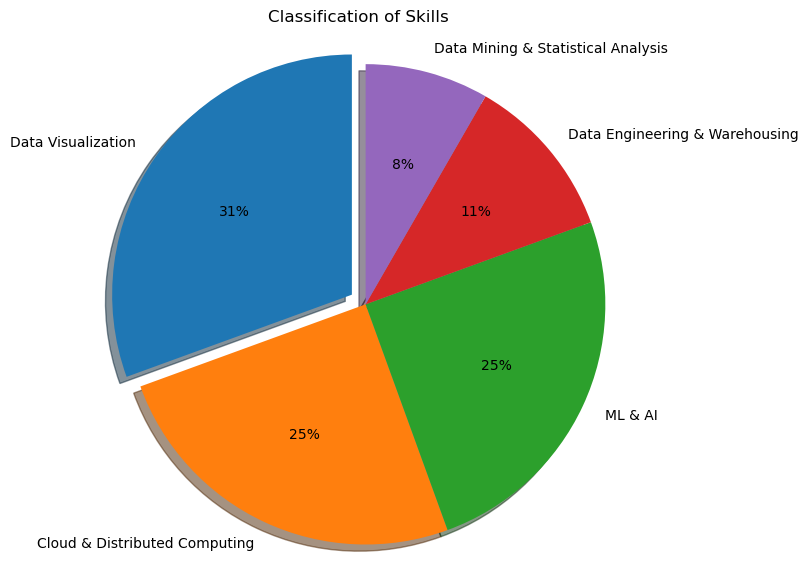

In [35]:
pie = plt.figure(figsize=(7,7))
plt.pie(summary['score'], labels=summary.index, explode = (0.07,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('Classification of Skills')
plt.axis('equal')
plt.show()

In [36]:
#skill gap analysis

In [37]:
skill_areas = {}

for area in terms:
    for skill in terms[area]:
        skill_areas[skill.lower()] = area  # lowercase for uniformity


In [38]:
missing_skills_by_area = {}
for skill in absent:
    skill_lower = skill.lower()
    if skill_lower in skill_areas:
        area = skill_areas[skill_lower]
        if area not in missing_skills_by_area:
            missing_skills_by_area[area] = []
        missing_skills_by_area[area].append(skill)


In [39]:
recommendations = {
    'ML & AI': [
        'Coursera - Machine Learning by Andrew Ng',
        'fast.ai Practical Deep Learning',
        'Hands-On ML with Scikit-Learn, Keras & TensorFlow (book)'
    ],
    'Data Visualization': [
        'Tableau Public Training',
        'DataCamp - Data Visualization in Python',
        'Storytelling with Data (book)'
    ],
    'Cloud & Distributed Computing': [
        'AWS Training and Certification',
        'Google Cloud Skills Boost',
        'Coursera - Cloud Computing Specialization'
    ],
    'Data Mining & Statistical Analysis': [
        'Khan Academy - Statistics and Probability',
        'Coursera - Data Analysis with R',
        'Think Stats (book, free online)'
    ],
    'Data Engineering & Warehousing': [
        'Data Engineering on Google Cloud (Coursera)',
        'YouTube - Data Engineering Simplified',
        'Designing Data-Intensive Applications (book)'
    ]
}


In [40]:
for area, skills in missing_skills_by_area.items():
    print(f"\n🔧 Area: {area}")
    print(f"Missing Skills: {skills}")
    print("📘 Recommended Resources:")
    for r in recommendations[area]:
        print(" -", r)



🔧 Area: Data Mining & Statistical Analysis
Missing Skills: ['math']
📘 Recommended Resources:
 - Khan Academy - Statistics and Probability
 - Coursera - Data Analysis with R
 - Think Stats (book, free online)


In [41]:
#missingskill importance
from collections import Counter

skill_importance = {}

for skill in absent:
    skill_lower = skill.lower()
    count = jd.lower().count(skill_lower)
    if count > 0:
        skill_importance[skill] = count


In [42]:
ranked_skills = sorted(skill_importance.items(), key=lambda x: x[1], reverse=True)

print("\n🔝 Ranked Missing Skills by Importance:")
for skill, freq in ranked_skills:
    print(f"{skill} - Importance Score: {freq}")



🔝 Ranked Missing Skills by Importance:
cs - Importance Score: 3
bonus - Importance Score: 2
statistics - Importance Score: 2
standard nlp analysis tooling - Importance Score: 1
communicate results clearly written - Importance Score: 1
analyzing large data sets - Importance Score: 1
years experience working - Importance Score: 1
experimental design 3 - Importance Score: 1
data visualization tools - Importance Score: 1
via presentations bonus - Importance Score: 1
text data - Importance Score: 1
strong knowledge - Importance Score: 1
solve problems - Importance Score: 1
quantitative field - Importance Score: 1
advanced degree - Importance Score: 1
well - Importance Score: 1
verbally - Importance Score: 1
sciences - Importance Score: 1
proficiency - Importance Score: 1
part - Importance Score: 1
math - Importance Score: 1
looker - Importance Score: 1
language - Importance Score: 1
jupyter - Importance Score: 1
ability - Importance Score: 1


In [43]:
# Step 1: Get total number of words in the job description
jd_words = jd.lower().split()
total_words = len(jd_words)

# Step 2: Create importance dictionary with normalized frequency
normalized_importance = {}

for skill in absent:
    skill_lower = skill.lower()
    count = jd.lower().count(skill_lower)
    if count > 0:
        normalized_score = (count / total_words) * 100
        normalized_importance[skill] = round(normalized_score, 4)

# Step 3: Sort by highest importance
ranked_skills = sorted(normalized_importance.items(), key=lambda x: x[1], reverse=True)

# Step 4: Display results
print("\n🔝 Ranked Missing Skills by Normalized Importance:")
for skill, score in ranked_skills:
    print(f"{skill} — {score}% relevance in JD")



🔝 Ranked Missing Skills by Normalized Importance:
cs — 4.2254% relevance in JD
bonus — 2.8169% relevance in JD
statistics — 2.8169% relevance in JD
standard nlp analysis tooling — 1.4085% relevance in JD
communicate results clearly written — 1.4085% relevance in JD
analyzing large data sets — 1.4085% relevance in JD
years experience working — 1.4085% relevance in JD
experimental design 3 — 1.4085% relevance in JD
data visualization tools — 1.4085% relevance in JD
via presentations bonus — 1.4085% relevance in JD
text data — 1.4085% relevance in JD
strong knowledge — 1.4085% relevance in JD
solve problems — 1.4085% relevance in JD
quantitative field — 1.4085% relevance in JD
advanced degree — 1.4085% relevance in JD
well — 1.4085% relevance in JD
verbally — 1.4085% relevance in JD
sciences — 1.4085% relevance in JD
proficiency — 1.4085% relevance in JD
part — 1.4085% relevance in JD
math — 1.4085% relevance in JD
looker — 1.4085% relevance in JD
language — 1.4085% relevance in JD
jupyt

In [44]:
#Limitations and improvement

In [45]:
def missing_skills(resume_keywords, job_keywords, terms):
    """
    Compare resume skills with job and predefined skills, and identify missing skills.
    """
    # Find missing skills
    missing = []
    
    # Check against job description
    for skill in job_keywords:
        if skill not in resume_keywords:
            missing.append(skill)

    # Check against predefined skill dictionary
    for category, skills in terms.items():
        for skill in skills:
            if skill not in resume_keywords and skill in job_keywords:
                missing.append(skill)
    
    # Return unique missing skills
    missing = list(set(missing))
    return missing

# Example usage
resume_keywords = ['python', 'nlp', 'data analysis']
job_keywords = ['python', 'ml', 'sql', 'data engineering']
missing = missing_skills(resume_keywords, job_keywords, terms)

print("\nMissing Skills:")
print(missing)



Missing Skills:
['data engineering', 'ml', 'sql']


In [46]:
!pip install textblob

In [47]:
from spellchecker import SpellChecker
from textblob import TextBlob

def grammar_and_spelling_feedback(text):
    """
    Detects spelling and grammar issues in the resume text.
    """
    spell = SpellChecker()
    blob = TextBlob(text)
    
    # Spelling Check
    words = text.split()
    spelling_issues = {word: spell.correction(word) for word in words if word != spell.correction(word)}
    
    # Grammar Check
    corrected_text = str(blob.correct())
    
    # Display issues
    print("\n🛑 Spelling Issues:")
    for word, correction in spelling_issues.items():
        print(f"- {word} ➝ {correction}")

    print("\n✅ Corrected Grammar Version:")
    print(corrected_text)
    
    return spelling_issues, corrected_text

# Example usage
resume_text = "I am a experinced data analist with proficency in Python and NLP."
spelling_issues, corrected_resume = grammar_and_spelling_feedback(resume_text)



🛑 Spelling Issues:
- experinced ➝ experienced
- analist ➝ analyst
- proficency ➝ proficiency
- NLP. ➝ nap

✅ Corrected Grammar Version:
I am a experienced data analyst with proficency in Python and NLP.


In [48]:
import textstat

def readability_feedback(text):
    """
    Provides readability score and suggestions.
    """
    score = textstat.flesch_reading_ease(text)
    
    print("\n📝 Readability Score:", score)

    if score < 50:
        print("❗ Suggestion: Your resume might be too complex. Simplify the language.")
    elif score > 80:
        print("✅ Suggestion: Your resume is easy to read.")
    else:
        print("⚙️ Suggestion: Your resume readability is moderate. Use bullet points and concise sentences.")

# Example usage
resume_text = "Developed and deployed machine learning models to enhance predictive accuracy by 20%."
readability_feedback(resume_text)



📝 Readability Score: 25.46
❗ Suggestion: Your resume might be too complex. Simplify the language.


In [49]:
action_verbs = ['achieved', 'improved', 'developed', 'designed', 'implemented', 'deployed',
                'optimized', 'collaborated', 'analyzed', 'delivered', 'streamlined', 'led']

def check_action_verbs(resume):
    """
    Checks if the resume contains sufficient action verbs.
    """
    missing_verbs = [verb for verb in action_verbs if verb not in resume.lower()]
    
    if missing_verbs:
        print("\n🚫 Missing Action Verbs:")
        print(", ".join(missing_verbs))
        print("\n✅ Suggestion: Use more action-oriented words to enhance impact.")
    else:
        print("\n✅ Your resume contains sufficient action verbs.")

# Example usage
check_action_verbs(resume_text)



🚫 Missing Action Verbs:
achieved, improved, designed, implemented, optimized, collaborated, analyzed, delivered, streamlined, led

✅ Suggestion: Use more action-oriented words to enhance impact.


In [50]:
soft_skills = ['communication', 'leadership', 'teamwork', 'creativity', 'problem-solving',
               'collaboration', 'adaptability', 'empathy', 'critical thinking']

def check_soft_skills(resume):
    """
    Detects missing soft skills in the resume.
    """
    missing_skills = [skill for skill in soft_skills if skill not in resume.lower()]
    
    if missing_skills:
        print("\n🚫 Missing Soft Skills:")
        print(", ".join(missing_skills))
        print("\n✅ Suggestion: Include more soft skills relevant to the job.")
    else:
        print("\n✅ Your resume contains a good variety of soft skills.")

# Example usage
check_soft_skills(resume_text)



🚫 Missing Soft Skills:
communication, leadership, teamwork, creativity, problem-solving, collaboration, adaptability, empathy, critical thinking

✅ Suggestion: Include more soft skills relevant to the job.


In [51]:
def generate_resume_feedback(resume, job_desc, terms):
    """
    Generates a full resume feedback report with limitations and improvements.
    """
    print("\n📄 RESUME FEEDBACK REPORT\n")

    # Missing Skills
    resume_keywords = resume.split()
    job_keywords = job_desc.split()
    missing = missing_skills(resume_keywords, job_keywords, terms)
    
    print("\n🔎 Missing Skills:")
    print(missing if missing else "✅ No missing skills detected.")

    # Grammar & Spelling
    grammar_and_spelling_feedback(resume)
    
    # Readability
    readability_feedback(resume)

    # Action Verbs
    check_action_verbs(resume)
    
    # Soft Skills
    check_soft_skills(resume)

# Example usage
generate_resume_feedback(resume_text, jd, terms)



📄 RESUME FEEDBACK REPORT


🔎 Missing Skills:
['Bonus:', 'written,', 'sets', 'Pandas,', 'field', 'data', 'ability', '(Numpy,', 'presentations', 'degree', 'that', 'Strong', 'Statistics,', 'as', 'solve', 'design', 'results', 'an', 'quantitative', 'Proficiency', 'data)', 'well', 'analyzing', 'verbally,', 'problems', 'clearly', 'working', 'with', 'CS,', '(Bonus:', '(Tableau,', 'visualization', 'years', 'tools', 'of', 'in', 'part', 'language/text', 'experience', 'Engineering,', 'statistics', 'Looker)', 'tooling', 'large', '3+', 'SQL', 'Jupyter)', 'analysis', '(', 'Sciences,', 'a', 'standard', 'experimental', 'The', 'Math)', 'NLP', 'advanced', 'communicate', 'via', 'knowledge']

🛑 Spelling Issues:
- 20%. ➝ None

✅ Corrected Grammar Version:
Developed and deployed machine learning models to enhance prediction accuracy by 20%.

📝 Readability Score: 25.46
❗ Suggestion: Your resume might be too complex. Simplify the language.

🚫 Missing Action Verbs:
achieved, improved, designed, implemented, op